In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cw_odmr_result = pd.read_table('D:\ODMRequipment\File\Dev0_T3_2022_12_27_16_31_29_s0.txt', skiprows=10, header=0)
cw_odmr_result

,Flag,Channel,Time(ps),Sync
0,0,0,200256,0
1,0,0,400256,0
2,0,0,600256,0
3,0,0,800256,0
4,0,0,1000256,0
...,...,...,...,...
27917652,0,0,600256,2791765
27917653,0,0,800256,2791765
27917654,0,0,1000256,2791765
27917655,0,0,1200256,2791765


In [4]:
intensity_result = cw_odmr_result['Sync']
v_counts = intensity_result.value_counts(sort=False)
v_counts

0           9
1          10
2          10
3          10
4          10
           ..
2791761    10
2791762    10
2791763    10
2791764    10
2791765     8
Name: Sync, Length: 2791766, dtype: int64

In [5]:
sweep_list_for_analysis = pd.read_csv('../RFGenerater/sweep_list_analysis.csv', index_col=0)
analysis_list = sweep_list_for_analysis.drop(labels=0,axis=0)
analysis_list


,SN,Freq,Level,Time,Freq Offset,Level Offset
313,314,256.24 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz
843,844,266.84 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz
99,100,251.96 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz
952,953,269.02 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz
816,817,266.3 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz
...,...,...,...,...,...,...
891,892,267.8 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz
900,901,267.98 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz
239,240,254.76 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz
726,727,264.5 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz


In [6]:
data_points = sweep_list_for_analysis.shape[0]
intensity_counts = []
for i in range(1,data_points):
    if i in v_counts.index.values:
        intensity_counts.append(v_counts.loc[i])
    else:
        intensity_counts.append(0)
analysis_list.insert(analysis_list.shape[1],'Intensity', np.array(intensity_counts))
analysis_list

,SN,Freq,Level,Time,Freq Offset,Level Offset,Intensity
313,314,256.24 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz,10
843,844,266.84 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz,10
99,100,251.96 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz,10
952,953,269.02 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz,10
816,817,266.3 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz,10
...,...,...,...,...,...,...,...
891,892,267.8 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz,10
900,901,267.98 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz,10
239,240,254.76 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz,10
726,727,264.5 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz,10


In [7]:
final_result = analysis_list.sort_index()
final_result

,SN,Freq,Level,Time,Freq Offset,Level Offset,Intensity
1,2,250.0 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz,10
2,3,250.02 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz,10
3,4,250.04 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz,10
4,5,250.06 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz,10
5,6,250.08 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz,10
...,...,...,...,...,...,...,...
997,998,269.92 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz,10
998,999,269.94 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz,10
999,1000,269.96 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz,10
1000,1001,269.98 MHz,20.0 dBm,100.0 ms,0.0 dB,0.0Hz,10


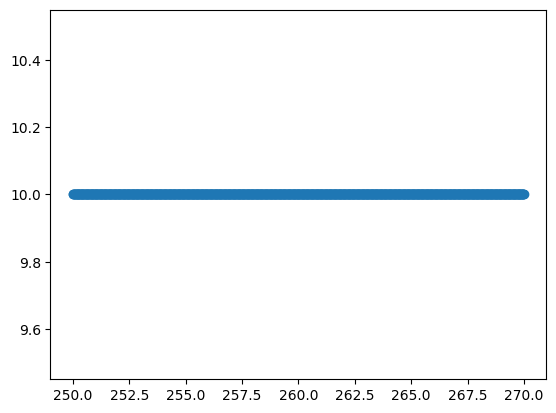

1       10
2       10
3       10
4       10
5       10
        ..
997     10
998     10
999     10
1000    10
1001    10
Name: Intensity, Length: 1001, dtype: int64


In [8]:
x = []
for items in final_result['Freq']:
    x.append(float(items[:-4]))
y = final_result['Intensity']
plt.scatter(x,y)
plt.show()
print(y)